In [3]:
import json

import pandas as pd

from math import pi
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display, clear_output

from sklearn.cluster import KMeans


In [4]:
def run_cluster(data, num_clusters=5):
    # create kmeans model
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)

    # find centers and labels
    centers = kmeans.cluster_centers_
    labels = kmeans.labels_

    # DataFrame of centroids
    centroids_df = pd.DataFrame(centers, columns=data.columns).T

    # print items in clusters
    clusters = {}
    for i in range(len(labels)):
        clusters[players[i]] = labels[i]

    for i in range(len(centers)):
        out = [k for k,v in clusters.items() if v==i]

        print('-'*30)
        print(f'cluster index: {i}')
        for item in out:
            print(item)
        print('\n')

#     centroids_df.to_csv('final_clusters.csv')
    return clusters, centroids_df


In [5]:
data = pd.read_csv('Data/nba_data_player.csv')
players = data.player.to_list()


In [6]:
# nba_data = nba_data.set_index('rank')
nba_data = data.drop(['Unnamed: 0', 'player', 'pos', 'team_id', 'age', 'mp', 'fg', 'fga','fg3',
 'fg3a','fg2',
 'fg2a','ft',
 'fta','orb',
 'drb',
 'trb',
 'ast',
 'stl',
 'blk',
 'tov',
 'pf',
 'pts',], axis=1)


In [7]:
num_clusters = 8
clusters, centroids_df = run_cluster(nba_data,  num_clusters)


------------------------------
cluster index: 0
Ryan Arcidiacono
Kent Bazemore
Patrick Beverley
Mikal Bridges
Bruce Brown
Jalen Brunson
Torrey Craig
Dewayne Dedmon
Damyean Dotson
Rudy Gay
Eric Gordon
Draymond Green
Jeff Green
Maurice Harkless
Gary Harris
Kevin Huerter
Jonathan Isaac
Jaren Jackson
Josh Jackson
Kevin Knox
Rodions Kurucs
Jeremy Lamb
Jake Layman
Alex Len
Robin Lopez
Rodney McGruder
Marcus Morris
Josh Okogie
Kelly Olynyk
Tomas Satoransky
Marcus Smart
Noah Vonleh
Derrick White
Justise Winslow
Avery Bradley
Reggie Bullock
Rodney Hood
Dario Saric
Iman Shumpert
Garrett Temple


------------------------------
cluster index: 1
Alex Abrines
Jaylen Adams
Grayson Allen
Kadeem Allen
Justin Anderson
Carmelo Anthony
Dwayne Bacon
J.J. Barea
Keita Bates-Diop
Jerryd Bayless
Michael Beasley
Jaron Blossomgame
Jonah Bolden
Isaiah Briscoe
Ryan Broekhoff
Dillon Brooks
MarShon Brooks
Lorenzo Brown
Troy Brown
Deonte Burton
Bruno Caboclo
Jose Calderon
Jevon Carter
Alex Caruso
Omri Casspi
Gary Cla

In [8]:
player_df = data[['player', 'team_id']]

player_cluster_df = pd.DataFrame([clusters]).T.reset_index()
player_cluster_df = player_cluster_df.rename(columns={'index':'player', 0:'cluster'})

player_type_df = player_df.merge(player_cluster_df, on='player')
player_type_df


,player,team_id,cluster
0,Alex Abrines,OKC,1
1,Jaylen Adams,ATL,1
2,Steven Adams,OKC,4
3,Bam Adebayo,MIA,7
4,LaMarcus Aldridge,SAS,4
...,...,...,...
419,Garrett Temple,LAC,0
420,Jonas Valanciunas,MEM,7
421,Christian Wood,NOP,1
422,Delon Wright,MEM,3


In [150]:
stats = ['trb_per_g', 'ast_per_g', 'stl_per_g', 'blk_per_g', 'pts_per_g', 'per',
        'usg_pct', 'ws', 'vorp']
len(stats)

9

In [151]:
cluster_stats = centroids_df.loc[stats]

cluster_stats.loc[['vorp']] = cluster_stats.loc[['vorp']]*5


cluster_stats

,0,1,2,3,4,5,6,7
trb_per_g,4.1475,2.390196,4.811628,2.874,9.547619,6.912500,4.581818,5.240476
ast_per_g,2.1875,1.217647,3.160465,1.862,1.904762,5.925000,3.102273,1.159524
stl_per_g,0.8400,0.453922,0.909302,0.596,0.814286,1.309375,0.915909,0.464286
blk_per_g,0.5100,0.250980,0.488372,0.284,1.333333,0.659375,0.431818,0.676190
pts_per_g,10.0200,5.242157,11.927907,8.005,14.423810,23.559375,14.377273,7.290476
per,12.3875,10.650980,13.779070,11.848,20.980952,22.465625,14.234091,18.007143
usg_pct,17.2450,16.610784,20.262791,17.474,20.314286,29.125000,19.731818,17.602381
ws,2.8075,0.572549,1.718605,2.201,7.690476,8.050000,4.863636,3.435714
vorp,2.5250,-0.671569,1.279070,0.660,12.904762,19.578125,6.636364,4.488095


In [149]:

cluster_stats.loc[:,'total'] = cluster_stats.loc[['stl_per_g']] + cluster_stats.loc[['blk_per_g']]

cluster_stats

,0,1,2,3,4,5,6,7,total
trb_per_g,4.1475,2.390196,4.811628,2.874,9.547619,6.912500,4.581818,5.240476,NaN
ast_per_g,2.1875,1.217647,3.160465,1.862,1.904762,5.925000,3.102273,1.159524,NaN
stl_per_g,0.8400,0.453922,0.909302,0.596,0.814286,1.309375,0.915909,0.464286,NaN
blk_per_g,0.5100,0.250980,0.488372,0.284,1.333333,0.659375,0.431818,0.676190,NaN
pts_per_g,10.0200,5.242157,11.927907,8.005,14.423810,23.559375,14.377273,7.290476,NaN
per,12.3875,10.650980,13.779070,11.848,20.980952,22.465625,14.234091,18.007143,NaN
usg_pct,17.2450,16.610784,20.262791,17.474,20.314286,29.125000,19.731818,17.602381,NaN
ws,2.8075,0.572549,1.718605,2.201,7.690476,8.050000,4.863636,3.435714,NaN
vorp,2.5250,-0.671569,1.279070,0.660,12.904762,19.578125,6.636364,4.488095,NaN


In [10]:
headers = [f'cluster {x}' for x in range(8)]

teams_only_df = player_type_df.loc[player_type_df.team_id != 'TOT'].groupby(['team_id', 'cluster']).count()
max_cluster_size = max([max(teams_only_df.xs(i, level='cluster').player) for i in range(num_clusters)])


In [12]:
centroids_df

,0,1,2,3,4,5,6,7
g,71.52500,34.754902,47.209302,68.86000,73.952381,71.906250,76.727273,61.166667
gs,48.72500,4.539216,33.813953,9.09000,69.095238,71.125000,75.204545,10.952381
fg_pct,0.44295,0.421990,0.440651,0.43370,0.567619,0.473187,0.448795,0.564619
fg3_pct,0.34325,0.305549,0.317233,0.33796,0.204952,0.336156,0.376614,0.180190
fg2_pct,0.50905,0.485245,0.492209,0.49995,0.592381,0.522969,0.503773,0.586476
...,...,...,...,...,...,...,...,...
ws_per_48,0.07410,0.054824,0.066488,0.07338,0.175190,0.160187,0.099432,0.154548
obpm,-0.89000,-2.401961,-0.897674,-1.12800,0.485714,3.934375,0.513636,-0.647619
dbpm,-0.00250,-0.794118,-0.293023,-0.73300,2.271429,0.456250,-0.284091,1.616667
bpm,-0.90750,-3.190196,-1.200000,-1.86700,2.747619,4.384375,0.229545,0.969048


In [121]:
# number of players in each cluster
cluster_counts = player_type_df.groupby(['cluster'])['player'].count()

# calculate the number of players per cluster in the average team
avg_values = list(cluster_counts/30)
avg_values += avg_values[:1]

# list of angles for polar axis


with open('Data/team_colors.json', 'r') as f:
    team_colors = json.load(f)

def plot_radar(headers, input_values, title='test', fill_color='k', edge_color='k'):
    values = input_values.copy()
    values += values[:1]

    angles = [n / float(len(headers)) * 2 * pi for n in range(len(headers))]
    angles += angles[:1]

    # add plot and figure properties
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, polar=True)
    ax.set_facecolor('#d3d3d3')

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    # set tick parameters
    plt.xticks(angles[:-1], headers)
    #plt.yticks([y for y in range(100)])
    ax.set_rlabel_position(0)

    ax.set_ylim([0, 30])

    ax.tick_params(axis='x', pad=25)
    ax.tick_params(axis='y', colors='#000000', labelsize=14)

    # plot average team overlay
    # ax.plot(angles, avg_values, color='#fcfcfc', linewidth=3.5)
    # ax.fill(angles, avg_values, facecolor='#eeeeee', alpha=0.5)
    
    print(angles)
    print(values)
    
    # plot and fill area
    ax.plot(angles, values, color=edge_color, linewidth=3.5)
    ax.fill(angles, values, facecolor=fill_color, alpha=0.5)

    ax.set_title(title, y=1)
    plt.show()


def plot_team(team_abbr):
    # filter data for team
    team_cluster_df = player_type_df.loc[player_type_df.team_id == team_abbr]

    # counts the number of players per cluster
    cluster_group = team_cluster_df.groupby(['cluster']).count()['player']
    cluster_count = {f'cluster {x}': 0 for x in range(8)}
    for i in range(len(cluster_group)):
        cluster_count[f'cluster {cluster_group.index[i]}'] = cluster_group.values[i]

    # get team colors
    colors = [item for item in team_colors[team_abbr.upper()].values()][1:]
    team = team_colors[team_abbr.upper()]['team']

    # plots radar chart
    plot_radar(headers, list(cluster_count.values()), f'player dist for {team}', colors[0], colors[1])


In [122]:
cluster_stats[5]

trb_per_g     6.912500
ast_per_g     5.925000
stl_per_g     1.309375
blk_per_g     0.659375
tov_per_g     2.993750
pts_per_g    23.559375
per          22.465625
usg_pct      29.125000
ws            8.050000
vorp         19.578125
Name: 5, dtype: float64

[0.0, 0.6981317007977318, 1.3962634015954636, 2.0943951023931953, 2.792526803190927, 3.490658503988659, 4.1887902047863905, 4.886921905584122, 5.585053606381854, 0.0]
[9.547619047619047, 1.9047619047619049, 0.8142857142857143, 1.3333333333333333, 14.423809523809524, 20.98095238095238, 20.314285714285713, 7.69047619047619, 12.904761904761905, 9.547619047619047]


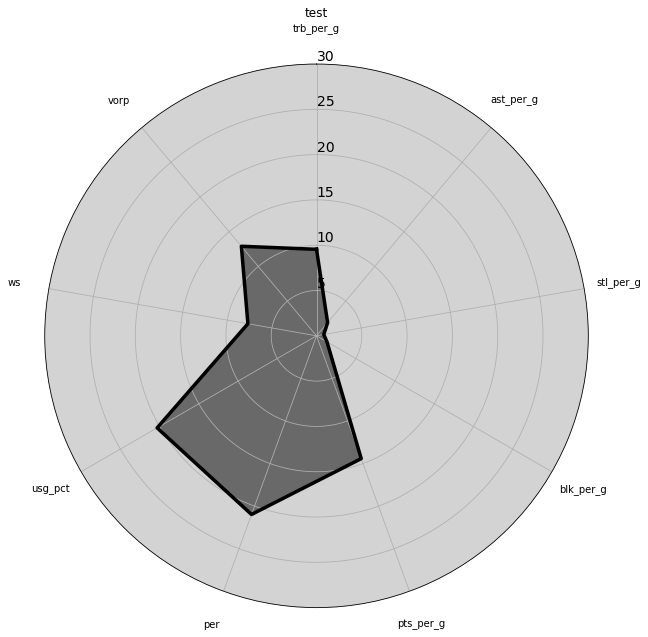

In [154]:
plot_radar(stats, list(cluster_stats[4]))